Confusion Matrix:
 [[1521   85]
 [  84    0]]


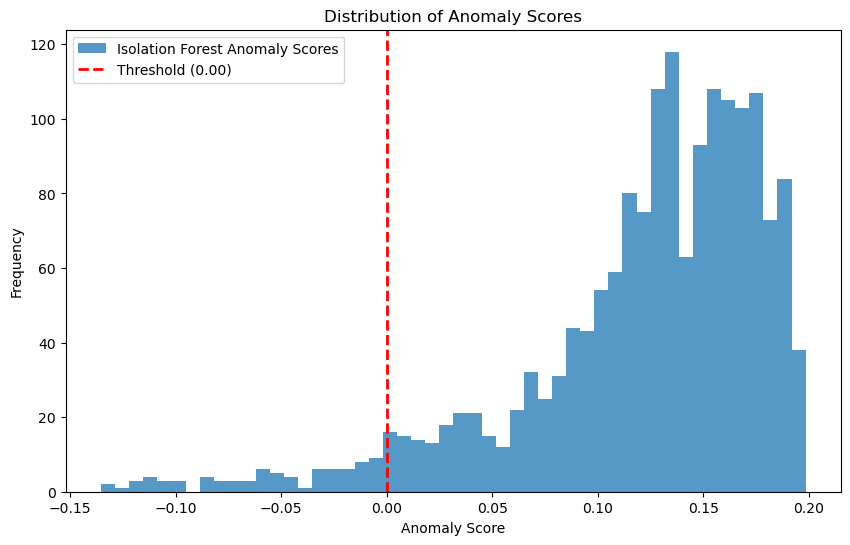

Số lượng điểm bất thường được phát hiện: 85
Tổng số điểm dữ liệu: 1690


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Đọc dữ liệu từ file CSV mới
data = pd.read_csv('../../data/Chiller.csv')
features = data.drop(columns=['Time'], errors='ignore')  # Loại bỏ cột 'Time' nếu có

# 2. Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 3. Khởi tạo và huấn luyện mô hình Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(scaled_features)

# 4. Dự đoán điểm bất thường
anomaly_scores = iso_forest.decision_function(scaled_features)  # Giá trị điểm bất thường (cao hơn là bình thường)
anomalies = iso_forest.predict(scaled_features)  # Kết quả -1 là bất thường, 1 là bình thường
anomalies = np.where(anomalies == -1, 1, 0)  # Chuyển -1 thành 1 (bất thường), 1 thành 0 (bình thường)

# 5. Giả lập bảng Confusion Matrix
# Giả sử 5% dữ liệu là bất thường (giả định không có nhãn thật)
pred_labels = anomalies  # 0 là bình thường, 1 là bất thường
true_labels = np.zeros_like(pred_labels)
true_labels[:int(0.05 * len(pred_labels))] = 1  # Giả sử 5% bất thường

# Tạo bảng confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:\n", cm)

# 6. Vẽ biểu đồ phân phối điểm bất thường
threshold = np.percentile(anomaly_scores, 5)  # Chọn ngưỡng từ phân vị 5%
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, alpha=0.75, label='Isolation Forest Anomaly Scores')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label=f'Threshold ({threshold:.2f})')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.legend()
plt.show()

# 7. Kết quả
print("Số lượng điểm bất thường được phát hiện:", anomalies.sum())
print("Tổng số điểm dữ liệu:", len(anomaly_scores))
